In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

DATA_FOLDER = 'data'

In [2]:
DATA_TRAIN = os.path.join(DATA_FOLDER, 'train.csv')
df = pd.read_csv(DATA_TRAIN, nrows=4000)

In [3]:
df.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [4]:
df.columns

Index(['Id', 'Prediction', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')

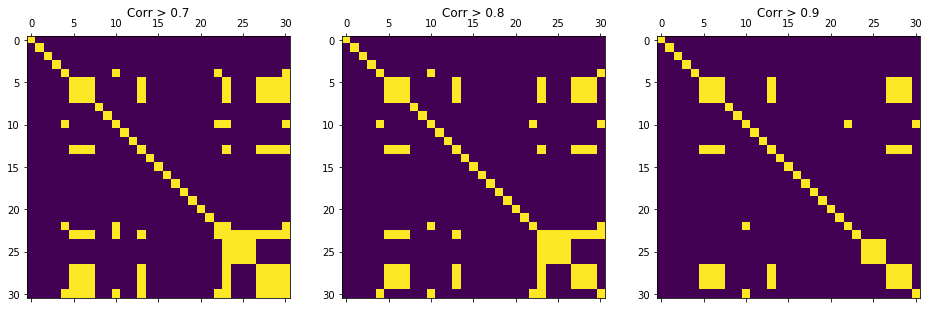

In [5]:
df_corr = df.corr()
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,8))
ax1.matshow(df_corr > 0.7); ax1.set_title('Corr > 0.7')
ax2.matshow(df_corr > 0.8); ax2.set_title('Corr > 0.8')
ax3.matshow(df_corr > 0.9); ax3.set_title('Corr > 0.9')
plt.show()

We can distinguish multiple groups. First there are few groups with id [5, 6, 7, 13, 27, 28, 29], [10, 22, 30], [24, 25, 26]

In [6]:
df_corr.iloc[5, [5, 6, 7, 13, 27, 28, 29]]

DER_deltaeta_jet_jet      1.000000
DER_mass_jet_jet          0.944020
DER_prodeta_jet_jet       0.999982
DER_lep_eta_centrality    0.999998
PRI_jet_subleading_pt     0.999300
PRI_jet_subleading_eta    0.999995
PRI_jet_subleading_phi    0.999996
Name: DER_deltaeta_jet_jet, dtype: float64

In [7]:
df_corr.iloc[10, [10, 22, 30]]

DER_sum_pt        1.000000
PRI_met_sumet     0.905795
PRI_jet_all_pt    0.969021
Name: DER_sum_pt, dtype: float64

In [8]:
df_corr.iloc[24, [24, 25, 26]]

PRI_jet_leading_pt     1.000000
PRI_jet_leading_eta    0.996374
PRI_jet_leading_phi    0.996381
Name: PRI_jet_leading_pt, dtype: float64

# Naive approach

In [9]:
DATA_TRAIN = os.path.join(DATA_FOLDER, 'train.csv')
df = pd.read_csv(DATA_TRAIN, nrows=10000)

In [10]:
df['cgt'] = [1 if item == 'b' else 0 for item in df.Prediction]

In [22]:
tx = df.iloc[:, 2:5].as_matrix()
tx_ = np.ones((tx.shape[0], tx.shape[1]+1))
tx_[:,1:] = tx
y = df.iloc[:, 32].as_matrix()

In [23]:
import pyml.implementations as imp

l, w = imp.least_squares_GD(y, tx_)

Gradient Descent 100 iter: loss=nan


/home/abbet/Documents/epfl/ma3_4/ML_course/projects/project1/pyml/implementations.py:13: RuntimeWarning: invalid value encountered in subtract
  w = w-gamma*grad
